<a href="https://colab.research.google.com/github/AliAlBadra/KerasTFImageClassificationCNN/blob/main/ImgClxCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

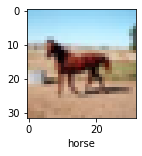

In [15]:
plot_sample(X_train, y_train, 44000)

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train[0]

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

In [32]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

In [33]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4884 - accuracy: 0.4611
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1242 - accuracy: 0.6039
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9704 - accuracy: 0.6619
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8574 - accuracy: 0.7005
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7804 - accuracy: 0.7288
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7166 - accuracy: 0.7497
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6579 - accuracy: 0.7695
Epoch 8/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.6049 - accuracy: 0.7902
Epoch 9/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.5530 - accuracy: 0.8063
Epoch 10/10
1563/1563 [==============================] - 67s 43m

In [41]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8874 - accuracy: 0.7131


[0.8873792886734009, 0.713100016117096]

In [36]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 128)       

In [37]:
dog_url = "https://mydogsdayinn.net/wp-content/uploads/2017/10/Maltese_puppy_portrait-300x261.jpg"
dog_path = tf.keras.utils.get_file('Cute_dog', origin=dog_url)

img = tf.keras.utils.load_img(
    dog_path, target_size=(32, 32)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = cnn.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to dog with a 23.20 percent confidence.


In [40]:
car_url = "https://car-images.bauersecure.com/pagefiles/87858/bmwi4_50.jpg"
car_path = tf.keras.utils.get_file('BMW_car', origin=car_url)

img = tf.keras.utils.load_img(
    car_path, target_size=(32, 32)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = cnn.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to automobile with a 23.20 percent confidence.
